In [1]:
import sys
sys.path.append('../')
sys.path.append('../get_branch/linear')
sys.path.append('../get_branch/cnn')
sys.path.append('../get_branch/max_pooling')
sys.path.append('../get_branch/adaptive_avg_pooling')
sys.path.append('../model_json/make_json_program/cnn')
sys.path.append('../util')

import json
import numpy as np
import matplotlib.pyplot as plt
import util_for_hist

import make_resnet34_json
import linear_input_branch
import linear_hidden_branch
import linear_output_branch
import cnn_input_branch
import cnn_hidden_branch
import cnn_output_branch
import max_pooling_branch
import adaptive_avg_pooling_branch

In [2]:
#画像は正方形を仮定
IMG_SIZE = 224

In [3]:
make_resnet34_json.make_json()

In [4]:
json_file = open('../model_json/json/resnet34.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_channels': 3,
  'out_channels': 64,
  'kernel_size': 7,
  'layer_type': 'input',
  'processing_type': 'cnn',
  'skip_connection': 0},
 'layer1': {'input_channels': 64,
  'out_channels': 64,
  'stride': 2,
  'layer_type': 'hidden',
  'processing_type': 'max_pooling',
  'skip_connection': 0},
 'layer2': {'input_channels': 64,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 1},
 'layer3': {'input_channels': 64,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 0},
 'layer4': {'input_channels': 64,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 1},
 'layer5': {'input_channels': 64,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 0},
 'layer6': {'input_channels': 64,
  'out_channels': 64,
  'kernel_siz

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    #input層
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(len(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE)))
            #print("##########################")

            
    #hidden層
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            #print(len(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE)))
            #print("##########################")

        elif layer_json_value["processing_type"] == "max_pooling":
            one_layer_branch_list, IMG_SIZE = max_pooling_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            #print(one_layer_branch_list)
            #print(len(one_layer_branch_list))
            #print(IMG_SIZE)
            #print("##########################")

        elif layer_json_value["processing_type"] == "adaptive_avg_pooling":
            one_layer_branch_list, IMG_SIZE = adaptive_avg_pooling_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            #print(one_layer_branch_list)
            #print(len(one_layer_branch_list))
            #print(IMG_SIZE)
            #print("##########################")

            
    #output層      
    if layer_json_value["layer_type"] == "output":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_output_branch.get_branch(layer_json_value))
            #print(linear_output_branch.get_branch(layer_json_value))
            #print(len(linear_output_branch.get_branch(layer_json_value)))
            #print("##########################")
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_output_branch.get_branch(layer_json_value,IMG_SIZE))
            
branch_list

array([3136., 3136., 3136., ..., 1000., 1000., 1000.])

In [6]:
IMG_SIZE

1

In [7]:
sort_set_branch_list = util_for_hist.get_sort_branch_list(branch_list)
sort_set_branch_list

[1.0,
 576.0,
 577.0,
 1000.0,
 1152.0,
 1153.0,
 2304.0,
 2305.0,
 3136.0,
 4608.0,
 4609.0]

In [8]:
max_branch = util_for_hist.get_max_set_branch(sort_set_branch_list)
max_branch

4609.0

In [9]:
min_sabun = util_for_hist.get_min_sabun(sort_set_branch_list)
min_sabun

152.0

In [10]:
bins = util_for_hist.get_bin(max_branch,min_sabun)
bins

31

(array([9.6337920e+06, 0.0000000e+00, 0.0000000e+00, 4.8168960e+06,
        0.0000000e+00, 0.0000000e+00, 5.1200000e+02, 1.2042240e+07,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.6929536e+07,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.5052800e+05, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.5323904e+07]),
 array([   0.        ,  148.67741935,  297.35483871,  446.03225806,
         594.70967742,  743.38709677,  892.06451613, 1040.74193548,
        1189.41935484, 1338.09677419, 1486.77419355, 1635.4516129 ,
        1784.12903226, 1932.80645161, 2081.48387097, 2230.16129032,
        2378.83870968, 2527.51612903, 2676.19354839, 2824.87096774,
        2973.5483871 , 3122.22580645, 3270.90322581, 3419.58064516,
        3568.25806452, 3716.93548387, 3865.61290323, 4014.290

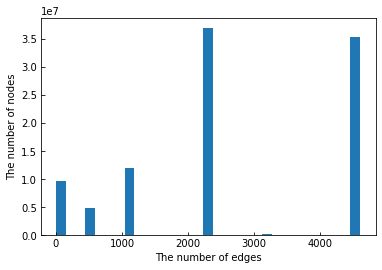

In [11]:
plt.rcParams["xtick.direction"] = "in" 
plt.rcParams["ytick.direction"] = "in" 
plt.xlabel("The number of edges")
plt.ylabel("The number of nodes")
plt.hist(branch_list,bins=bins,range=(0,max_branch))